
# DATA EXPLORATION
We begin by exploring the data exploration aspect of the process 

In [69]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv("toptex.csv")

# First few rows of the dataframe
df.head()



,Cust_ID,Gender_F_Flag,Gender_M_Flag,Residence_distance_from_store,time_in_store,accompanying_people,family_size,total_purchase_amount
0,1,1,0,1,49,0,4,113
1,2,1,0,4,52,3,4,959
2,3,1,0,4,51,1,5,1247
3,4,0,1,8,38,3,4,2116
4,5,1,0,2,52,4,6,1472


We observe that the dataset contains cust_id, binary information about gender, Distance from store, time spent , # of people with them , # of family members , Amount they spend on the store. 

From this we can easily start to formulate our stratergy of seperating our Features as independent variables (x) and output or target variables (y) for a naive MLR model Let's Explore this hypothesis further by further analysing the dataset and its features. Though a serious consideration should be given while selecting the features for x .

In [70]:
# Summary statistics of the dataset
df.describe()

,Cust_ID,Gender_F_Flag,Gender_M_Flag,Residence_distance_from_store,time_in_store,accompanying_people,family_size,total_purchase_amount
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,2190.500000,0.702511,0.297489,5.003425,47.952740,3.019635,4.034475,1580.639498
std,1264.541419,0.457205,0.457205,2.226137,6.982038,1.721425,1.043668,439.721994
min,1.000000,0.000000,0.000000,0.000000,34.000000,0.000000,1.000000,113.000000
25%,1095.750000,0.000000,0.000000,3.000000,39.000000,2.000000,3.000000,1274.750000
50%,2190.500000,1.000000,0.000000,5.000000,52.000000,3.000000,4.000000,1566.000000
75%,3285.250000,1.000000,1.000000,6.000000,53.000000,4.000000,5.000000,1874.000000
max,4380.000000,1.000000,1.000000,16.000000,57.000000,11.000000,8.000000,3259.000000


In [71]:
# Check for missing values
print(df.isnull().sum())

Cust_ID                          0
Gender_F_Flag                    0
Gender_M_Flag                    0
Residence_distance_from_store    0
time_in_store                    0
accompanying_people              0
family_size                      0
total_purchase_amount            0
dtype: int64


We observe that the data doesn't have any null values i.e. it is not sparse associated with it which is a good sign as we dont have to manually assign values or remove any specific outliers which might hinder our model's performance. 

We should also Remove the 'Cust_ID' column that might inflate our model prediction and induce large error and with respect to common practices in large data sets an identiy of a customer shouldn't influence the purchase amount rather the features associated with it should. 

In [72]:
df = df.drop('Cust_ID', axis=1)
df.head()


,Gender_F_Flag,Gender_M_Flag,Residence_distance_from_store,time_in_store,accompanying_people,family_size,total_purchase_amount
0,1,0,1,49,0,4,113
1,1,0,4,52,3,4,959
2,1,0,4,51,1,5,1247
3,0,1,8,38,3,4,2116
4,1,0,2,52,4,6,1472


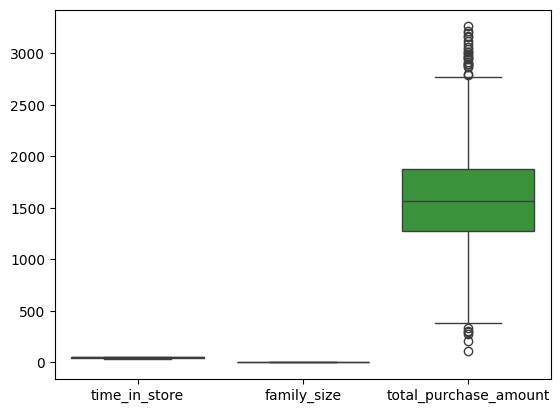

In [73]:
# Check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of numerical features
sns.boxplot(data=df[['time_in_store', 'family_size', 'total_purchase_amount']])
plt.show()

# Now lets visualise the correlation matrix for the features.

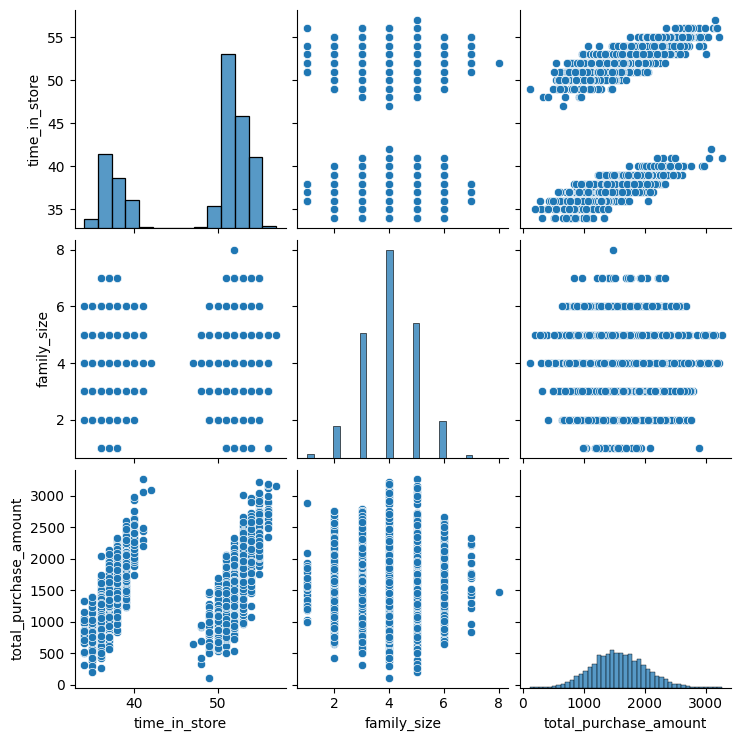

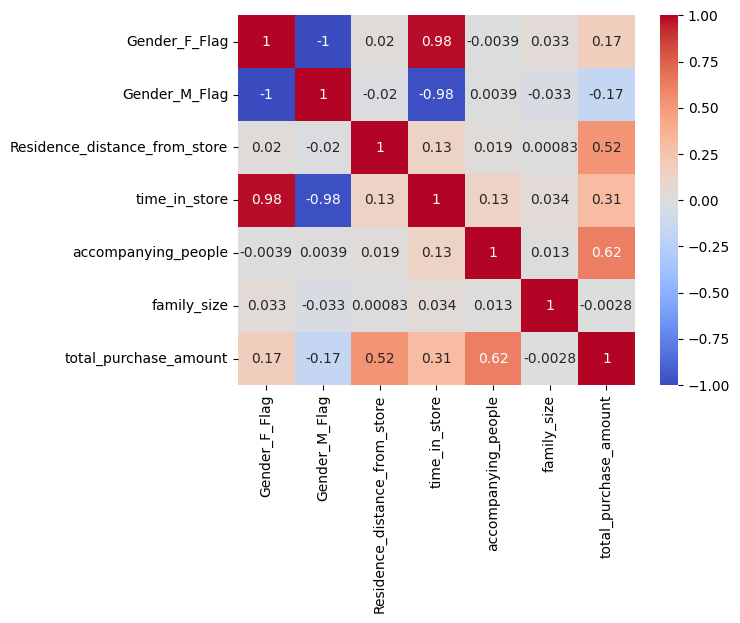

In [74]:
# Visualize relationships between variables
sns.pairplot(df[['time_in_store', 'family_size', 'total_purchase_amount']])
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficients, but the most popular is Pearson's Correlation Coefficient.

Pearson's correlation coefficient (r) is a measure of the linear relationship between two variables. It's value lies between -1 and +1.

+1: Perfect positive linear relationship. As one variable increases, the other variable also increases.
0: No linear relationship. The two variables do not increase or decrease together.
-1: Perfect negative linear relationship. As one variable increases, the other decreases.

# Key Insights:

We observe that the FGender and time in store have a very high correlation while its opposite for the MGender.

Purchase amount our target variable (y) has a moderate correlation with the store distance , accompanying people , time_in_store 
A slight negative next to null correlation with family size. 



Since , The executive has a distain for random forest we shall use Linear regression and evaluate the metrics to test that it is better for our data. 
Let's Import all the necessary Libraries. 

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

# Split the data into features (X) and target (y)
X = df[['Gender_F_Flag', 'Gender_M_Flag', 'Residence_distance_from_store', 'time_in_store', 'accompanying_people', 'family_size']]
y = df['total_purchase_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=[20,20,20,20], max_iter=5000),
    'XGBoost': GradientBoostingRegressor(),
    'knn': KNeighborsRegressor(),
    'Elastic Net' : ElasticNet()
}

# Prepare a dictionary to store the results
results = {
    "Model": [],
    "R2": [],
    "MSE": [],
    "Durbin Watson": [],
    "Jarque-Bera": [],
    "JB-pvalue": []
}

# For each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    dw = durbin_watson(y_test - y_pred)
    jb = stats.jarque_bera(y_test - y_pred)
    
    # Store the results
    results["Model"].append(model_name)
    results["R2"].append(r2)
    results["MSE"].append(mse)
    results["Durbin Watson"].append(dw)
    results["Jarque-Bera"].append(jb[0])
    results["JB-pvalue"].append(jb[1])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,Model,R2,MSE,Durbin Watson,Jarque-Bera,JB-pvalue
0,Linear Regression,0.675890,62617.055722,1.971871,1.215099,0.544684
1,Random Forest,0.620853,73250.035418,1.999748,0.050043,0.975289
2,Neural Network,0.676388,62520.878043,1.974992,1.954362,0.376371
3,XGBoost,0.659657,65753.316273,1.969304,1.142249,0.564890
4,knn,0.598659,77537.840365,2.011377,1.532093,0.464847
5,Elastic Net,0.664538,64810.259607,1.968707,2.343303,0.309855


Recommendations:

Linear Regression:
High R2 and relatively low MSE indicate good predictive performance.
Durbin-Watson close to 2 suggests no significant autocorrelation.
Acceptable normality based on Jarque-Bera test.

Random Forest:
Slightly lower R2 compared to Linear Regression.
Higher Durbin-Watson might indicate potential positive autocorrelation.
Good normality based on low Jarque-Bera and p-value.


Use of Linear Regression should be prefered in this feature engineering

Our prototype perliminary model analysis using the inbuilt models of sklearn library , we clearly see that Linear Regression with out naive feature engineering performs better than RF as per executive's expectation.

We shall now do more advanced feature engeneering -> droping coloumns , Creating new features from old to boost our score and hoepfully get a better Linear Regression model overall

Let's Begin with PCA (Principal Component Analysis)

In [94]:
from sklearn.decomposition import PCA
# Split the data into features (X) and target (y)
X = df[['Gender_F_Flag', 'Gender_M_Flag', 'Residence_distance_from_store', 'time_in_store', 'accompanying_people', 'family_size']]
y = df['total_purchase_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
    
}

# Apply PCA
pca = PCA(n_components=3)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Prepare a dictionary to store the results
results = {
    "Model": [],
    "R2": [],
    "MSE": [],
    "Durbin Watson": [],
    "Jarque-Bera": [],
    "JB-pvalue": []
}

# For each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train_pca, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_pca)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    dw = durbin_watson(y_test - y_pred)
    jb = stats.jarque_bera(y_test - y_pred)
    
    # Store the results
    results["Model"].append(model_name)
    results["R2"].append(r2)
    results["MSE"].append(mse)
    results["Durbin Watson"].append(dw)
    results["Jarque-Bera"].append(jb[0])
    results["JB-pvalue"].append(jb[1])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df


,Model,R2,MSE,Durbin Watson,Jarque-Bera,JB-pvalue
0,Linear Regression,0.675250,62740.827135,1.965698,1.90457,0.385858
1,Random Forest,0.621677,73090.836878,1.998656,0.10061,0.950939


We observe that PCA analysis doesn't really help that much in this case,
PCA is not significantly improving model performance, it might suggest that the original features already capture most of the relevant information, and reducing dimensionality doesn't provide substantial benefits in this context.

In [96]:
df['F1'] = df['time_in_store']*df['Gender_F_Flag']
df['F2'] = df['time_in_store']**2
df['F3'] = df['accompanying_people']**2
df['F4'] = df['Residence_distance_from_store']**2
# Split the data into features (X) and target (y)
X = df[['F1', 'Residence_distance_from_store', 'time_in_store', 'accompanying_people', 'F2', 'F3', 'F4']]
y = df['total_purchase_amount']
df.to_csv(f'aug_df.csv', index=False)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    
}

# Prepare a dictionary to store the results
results = {
    "Model": [],
    "R2": [],
    "MSE": [],
    "Durbin Watson": [],
    "Jarque-Bera": [],
    "JB-pvalue": []
}

results1 = {
    "Model": [],
    "R2": [],
    "MSE": [],
    "Durbin Watson": [],
    "Jarque-Bera": [],
    "JB-pvalue": []
}

# For each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_train)
    
    # Calculate performance metrics
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    dw = durbin_watson(y_train - y_pred)
    jb = stats.jarque_bera(y_train - y_pred)
    
    # Store the results
    results1["Model"].append(model_name)
    results1["R2"].append(r2)
    results1["MSE"].append(mse)
    results1["Durbin Watson"].append(dw)
    results1["Jarque-Bera"].append(jb[0])
    results1["JB-pvalue"].append(jb[1])
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    dw = durbin_watson(y_test - y_pred)
    jb = stats.jarque_bera(y_test - y_pred)
    
    # Store the results
    results["Model"].append(model_name)
    results["R2"].append(r2)
    results["MSE"].append(mse)
    results["Durbin Watson"].append(dw)
    results["Jarque-Bera"].append(jb[0])
    results["JB-pvalue"].append(jb[1])

# Convert the results to a DataFrame
results_df_test = pd.DataFrame(results)
results_df_train = pd.DataFrame(results1)

# Display the results
print('Test Data Performance')
print(results_df_test.to_string())
print("-------------------------------------------------")
print('Train Data Performance')
print(results_df_train.to_string())


Test Data Performance
               Model        R2           MSE  Durbin Watson  Jarque-Bera  JB-pvalue
0  Linear Regression  0.675262  62738.393923        1.96755     1.247841   0.535839
1      Random Forest  0.660156  65656.890089        1.96750     1.056290   0.589698
-------------------------------------------------
Train Data Performance
               Model        R2           MSE  Durbin Watson  Jarque-Bera  JB-pvalue
0  Linear Regression  0.679736  61894.390069       1.974105     0.035876   0.982222
1      Random Forest  0.695003  58943.872031       1.977476     0.317465   0.853225


We observe that intrducing new features as well doesn't seeem to improve the model's effectiveness by much . Reast assured we can now make a educated suggestion to improve the stores performance 

Let's Tackle the predicting the time part setting it as target variable (y) and rest as x while dropping cust_id and MGender as both of them have no correlation or highly negative correlation with time .

In [83]:
# Split the data into features (X) and target (y)
X = df[['Gender_F_Flag', 'Residence_distance_from_store',  'accompanying_people', 'family_size', 'total_purchase_amount']]
y = df['time_in_store']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}
# Prepare a dictionary to store the results
results = {
    "Model": [],
    "R2": [],
    "MSE": [],
    "Durbin Watson": [],
    "Jarque-Bera": [],
    "JB-pvalue": []
}

# For each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    dw = durbin_watson(y_test - y_pred)
    jb = stats.jarque_bera(y_test - y_pred)
    
    # Store the results
    results["Model"].append(model_name)
    results["R2"].append(r2)
    results["MSE"].append(mse)
    results["Durbin Watson"].append(dw)
    results["Jarque-Bera"].append(jb[0])
    results["JB-pvalue"].append(jb[1])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Test Data Performance") 
results_df


Test Data Performance


,Model,R2,MSE,Durbin Watson,Jarque-Bera,JB-pvalue
0,Linear Regression,0.997229,0.130401,1.924993,138.856296,7.042688e-31
1,Random Forest,0.999823,0.008344,1.841330,178715.067150,0.000000e+00


It seems like the models, particularly Linear Regression and Random Forest, are performing exceptionally well based on the provided metrics for predicting the time_in_store. Here's an interpretation of the performance metrics:

Linear Regression:
R-squared (R2): 0.9972: This indicates an extremely high proportion of variance in the target variable (time_in_store) is explained by the model.
Mean Squared Error (MSE): 0.1304: The MSE is very low, suggesting that predictions are close to the actual values.
Durbin-Watson: 1.925: The Durbin-Watson statistic tests for autocorrelation in the residuals. A value around 2 indicates no significant autocorrelation.
Jarque-Bera: 138.856: This is a test for normality of residuals. The lower the value, the more the residuals deviate from a normal distribution. However, the p-value is extremely low (7.04e-31), indicating that the null hypothesis of normality is rejected.

Random Forest:
R2: 0.9998: An even higher R2 value, suggesting an even better fit to the data compared to Linear Regression.
MSE: 0.0083: An extremely low MSE, indicating excellent model performance.
Durbin-Watson: 1.841: Again, close to 2, suggesting no significant autocorrelation.
Jarque-Bera: 178715.067: The JB statistic is extremely high, indicating a departure from normality in residuals. However, the p-value is 0, indicating a significant deviation.

# SUGGESTIONS 

# Summary and Suggestions

Based on the analysis of the data, we have the following observations and suggestions:

1. **Gender**: There is a significant correlation between gender and time spent in the store. Female customers tend to spend more time in the store than male customers. Therefore, we suggest tailoring marketing strategies to attract more female customers, which could potentially increase the total purchase amount.

2. **Residence Distance from Store**: There is a positive correlation between the distance of a customer's residence from the store and the total purchase amount. This could be due to the fact that customers who live further away tend to buy more items per visit to reduce the frequency of their trips. We suggest offering delivery services or incentives for bulk purchases to encourage these customers to continue shopping in large amounts.

3. **Time in Store**: There is a positive correlation between the time spent in the store and the total purchase amount. This suggests that the longer a customer stays in the store, the more they tend to buy. We suggest improving the in-store experience to encourage customers to spend more time in the store. This could include providing comfortable seating areas, hosting in-store events, or improving the store layout to encourage browsing.

4. **Accompanying People**: The number of people accompanying a customer also has a positive correlation with the total purchase amount. This could be due to group shopping where purchases are generally higher. We suggest creating a family-friendly environment in the store to attract groups or families.

5. **Family Size**:  Larger families tend to buy more items. We suggest offering family-size packages or discounts for buying in bulk to attract these customers.

7. **Survey Data Collection**: To gather more information about the consumers, we suggest implementing a friendly and engaging survey process. This could be facilitated by helpful staff members who can guide customers through the survey. Offering free food try-outs and beverages in the waiting hall could also encourage more customers to participate in the survey. This approach not only makes the survey process more enjoyable for the customers, but it also provides an opportunity for immediate feedback on the food samples.

8. **Machine Learning Models**: Several machine learning models have been imported in the notebook, such as ElasticNet, GradientBoostingRegressor, KNeighborsRegressor, LinearRegression, MLPRegressor, RandomForestRegressor, and SVR. These models can be used to predict the total purchase amount based on the features we have. We suggest using these models to gain more insights and make more accurate predictions about customer behavior.




# Short-Term Strategy List and Plan

Given the context and the analysis of the data, here are some short-term strategies to increase the time spent in the store and sales:

1. **Advertising**: Implement targeted advertising campaigns to attract more female customers and families, as they tend to spend more time in the store and make larger purchases. 

2. **Human Behavior**: Leverage the positive correlation between the time spent in the store and the total purchase amount. Improve the in-store experience to encourage customers to spend more time in the store. This could include providing comfortable seating areas, hosting in-store events, or improving the store layout to encourage browsing.

3. **Efficient Management**: Offer delivery services or incentives for bulk purchases to encourage customers who live further away to continue shopping in large amounts. Also, consider offering family-size packages or discounts for buying in bulk to attract larger families.

4. **Survey Data Collection**: Implement a friendly and engaging survey process to gather more information about the consumers. This could be facilitated by helpful staff members who can guide customers through the survey. Offering free food try-outs and beverages in the waiting hall could also encourage more customers to participate in the survey. This approach not only makes the survey process more enjoyable for the customers, but it also provides an opportunity for immediate feedback on the food samples.

Remember, these are short-term strategies and should be evaluated regularly for their effectiveness. Based on the results, adjustments can be made as necessary.

